In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import random
import time

In [2]:
def get_question_record(question, array_values):
    cos_sim_values = []  # Initialize a list to accumulate cosine similarity values
    
    for value in array_values:
        cos_sim = value        
        # Generate timestamp
        # Sleep first.
        # Sleep for 100 milliseconds
        time.sleep(0.1)
        timestamp = datetime.now()
        
        # Append cosine similarity value and timestamp to the list as a dictionary
        cos_sim_values.append(cos_sim)
#         cos_sim_values.append({'cos_sim': cos_sim, 'timestamp': timestamp})
    
    # Create a dictionary for the data row with question and metrics array
    data_row = {'Question': question, 'Metrics': cos_sim_values}
    
    return data_row

# Example usage
df = pd.DataFrame(columns=['Question', 'Metrics'])
questions = ['Q1', 'Q2', 'Q3']
for question in questions:
    array_values = [random.random() for _ in range(random.randint(3, 7))]  # Random list of values between 0 and 1
    generated_data = get_question_record(question, array_values)
    df = df.append(generated_data, ignore_index=True)
    print(generated_data)  # Display the generated data row

print('\ndf.shape:', df.shape)
print('df.info():', df.info())
df.head()

{'Question': 'Q1', 'Metrics': [0.4598485134789827, 0.562656953028457, 0.27538184049045744, 0.5065200130512661, 0.18854490127947487]}
{'Question': 'Q2', 'Metrics': [0.05435635647980597, 0.6928778088816402, 0.8826128012406236, 0.5221207925793093]}
{'Question': 'Q3', 'Metrics': [0.09018124950950424, 0.4778015445552466, 0.9519301103111784]}

df.shape: (3, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  3 non-null      object
 1   Metrics   3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes
df.info(): None


,Question,Metrics
0,Q1,"[0.4598485134789827, 0.562656953028457, 0.2753..."
1,Q2,"[0.05435635647980597, 0.6928778088816402, 0.88..."
2,Q3,"[0.09018124950950424, 0.4778015445552466, 0.95..."


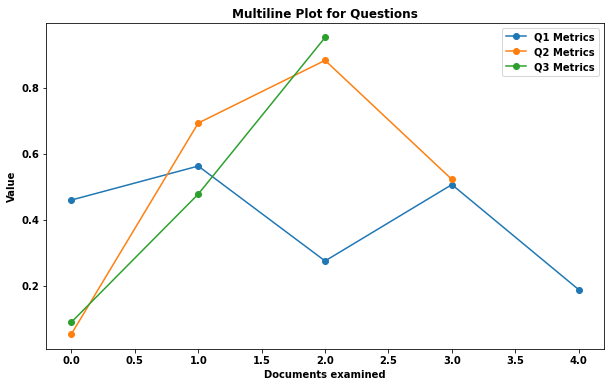

In [3]:
# Plotting multiline plot for each question's metrics
plt.figure(figsize=(10, 6))

for i, (_, row) in enumerate(df.iterrows()):
#     timestamps = [item['timestamp'] for item in row['Metrics']]
#     values = [item['cos_sim'] for item in row['Metrics']]
    values = [item for item in row['Metrics']]
    plt.plot(values, label=f'{row["Question"]} Metrics', linestyle='-', marker='o')
#     plt.plot(timestamps, values, label=f'{row["Question"]} Metrics', linestyle='-', marker='o')

plt.xlabel('Documents examined')
plt.ylabel('Value')
plt.title('Multiline Plot for Questions')
plt.legend()
plt.show()

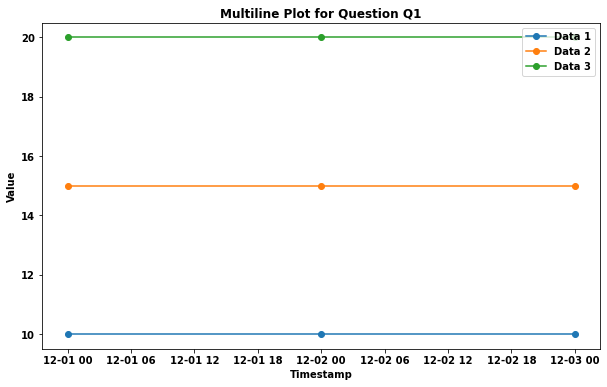

In [4]:
# Create an empty DataFrame with columns 'Question' and 'Metrics'
df = pd.DataFrame(columns=['Question', 'Metrics'])

# Sample data (replace this with your actual data)
data = [
    {'Question': 'Q1', 'Metrics': {'value': [10, 15, 20], 'timestamp': ['2023-12-01', '2023-12-02', '2023-12-03']}},
    {'Question': 'Q1', 'Metrics': {'value': [5, 12, 18], 'timestamp': ['2023-12-01', '2023-12-02', '2023-12-03']}},
    # Add more data here for other questions...
]

# Add data to the DataFrame in a loop
for d in data:
    df = df.append(d, ignore_index=True)

# Convert 'timestamp' column to datetime
df['Metrics'] = df['Metrics'].apply(lambda x: {'value': x['value'], 'timestamp': pd.to_datetime(x['timestamp'])})

# Extract data for the first question
question1_data = df[df['Question'] == 'Q1']['Metrics'].iloc[0]

# Plotting multiline plot for the first question
plt.figure(figsize=(10, 6))

for i in range(len(question1_data['value'])):
    plt.plot_date(question1_data['timestamp'], [question1_data['value'][i]] * len(question1_data['timestamp']),
                  label=f'Data {i+1}', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Multiline Plot for Question Q1')
plt.legend()
plt.show()
